In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
import statistics
from scipy import asarray as ar,exp

In [2]:
#Co-57_nFZ
Cn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Co-57_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#Co-57_pFZ
Cp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Co-57_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#Co-57_nMCz
CnC = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Co-57_nMCz_V150_test.txt", skiprows = 0, unpack = True)
#noise nFz
Cbn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#noise pFz
Cbp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#noise nMCZ
CbnC= np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nMCz_V150_test.txt", skiprows = 0, unpack = True)

In [3]:
x1=ar(range(1024))

mu_right= 694.9800691946402 , Standardfehler= 2.605947752874373
sig_right= 19.431285391674987 , Standardfehler= 4.126544046404808
45.75718034103332
45.75718034103332


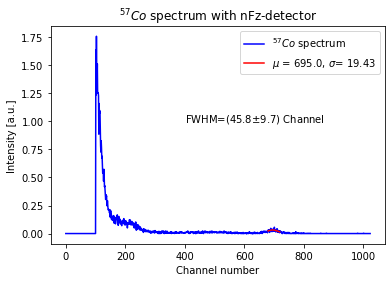

In [36]:
#Co-57_nFZ
A=Cbn/300.005000
Ax= Cn/300.019000
Cnr=Ax-A
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

#popt,pcov = curve_fit(gaussian,x1[99:110],Cnr[99:110],p0=[530,100,1])
popt11,pcov11 = curve_fit(gaussian,x1[680:720],Cnr[680:720],p0=[0.25,700,1])
#print("mu_left=",popt[1],", Standardfehler=", np.sqrt(pcov[1][1]))
#print("sig_left=",popt[2],", Standardfehler=", np.sqrt(pcov[2][2]))
print("mu_right=",popt11[1],", Standardfehler=", np.sqrt(pcov11[1][1]))
print("sig_right=",popt11[2],", Standardfehler=", np.sqrt(pcov11[2][2]))
x_k=np.arange(680,720)
#plt.xlim(640,780)
plt.plot(x1,Cnr, 'b-', label=r'$^{57}Co$ spectrum')
plt.plot(x_k,gaussian(x_k,*popt11),'r',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt11[1],popt11[2]))
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{57}Co$ spectrum with nFz-detector')
plt.legend(loc='best')
sig=popt11[2]
FWHM= 2*np.sqrt(2*np.log(2))*sig
sig_err = np.sqrt(pcov11[2][2])
FWHM_err= 2*np.sqrt(2*np.log(2))*sig_err
print(FWHM)
plt.text(x=400, y=1.0,s=r'FWHM=({:1.3}$\pm${:1.2}) Channel'. format(FWHM,FWHM_err))
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Co_nFz.pdf', format='pdf')
print(FWHM)
plt.show()

mu_right= 746.6337009339665 , Standardfehler= 1.8857568393983284
sig_right= 15.133204866818975 , Standardfehler= 2.651908187281182
35.63597416594524
45.75718034103332


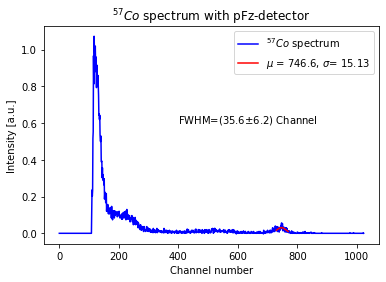

In [37]:
#Co-57_pFZ minus background noise
B=Cbp/300.004000
Bx=Cp/300.019000
Cpr=Bx-B
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

popt1,pcov1 = curve_fit(gaussian,x1[730:770],Cpr[730:770],p0=[0.06,750,1])
print("mu_right=",popt1[1],", Standardfehler=", np.sqrt(pcov1[1][1]))
print("sig_right=",popt1[2],", Standardfehler=", np.sqrt(pcov1[2][2]))
x_k1=np.arange(730,770)
plt.plot(x1,Cpr, 'b-', label=r'$^{57}Co$ spectrum')
plt.plot(x_k1,gaussian(x_k1,*popt1),'r',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt1[1],popt1[2]))
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{57}Co$ spectrum with pFz-detector')
plt.legend(loc='best')
sig2=popt1[2]
FWHM2= 2*np.sqrt(2*np.log(2))*sig2
print(FWHM2)
sig_err2 = np.sqrt(pcov1[2][2])
FWHM_err2= 2*np.sqrt(2*np.log(2))*sig_err2
print(FWHM)
plt.text(x=400, y=0.6,s=r'FWHM=({:1.3}$\pm${:1.2}) Channel'. format(FWHM2,FWHM_err2))
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Co_pFz.pdf', format='pdf')
plt.show()

mu_right= 655.0 , Standardfehler= 417179333322828.7
sig_right= 1.0 , Standardfehler= 32088659553466.145


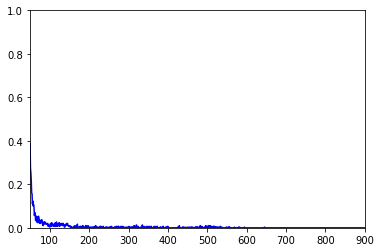

In [27]:
#Co57-nMCZ minus background noise
C=CbnC/155.215000
Cx=CnC/300.001000
CnCr=Cx-C
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

popt2,pcov2 = curve_fit(gaussian,x1[640:650],CnCr[640:650],p0=[0.004,655,1])
print("mu_right=",popt2[1],", Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig_right=",popt2[2],", Standardfehler=", np.sqrt(pcov2[2][2]))
x_k2=np.arange(640,650)
plt.xlim(50,900)
plt.ylim(0,1)
#plt.plot(x_k2,gaussian(x_k2,*popt2),'r',label='fit')
plt.plot(x1,Cx, 'b-', label='Co57-nMCZ')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Co_nMCz.pdf', format='pdf')
plt.show()